# Examine Matt's experiments:

raijin:/short/v19/mtc599/mom5/mom_cafe/mom_mac: source code, atmosphere is same as used in jul18b experiment. 

raijin:/short/v19/mtc599/ao_am2/nov17n/out23/ #An experiment with nominal year climatology
 
raijin:/short/v19/mtc599/ao_am2/jul18b #Another experiment, but with time-varying atmospheric fields, 1980-2009. submit.ksh run script.


raijin:/g/data1a/v14/tok599/atmos_forcing/CMIP5/gfdl_cm2.1.forcings.tgz
 
it should contain the following data
 
ghgs: *gblannualdata
ozone concentrations: CM3_CMIP5_ACC_SPARC_1850-2009_T3M_O3.nc
aerosol concentrations: aerosol.climatology.nc
solar: CMIP5_1610-2008_monthly_data_b18
volcano: *sw_data.nc
landuse: landuse.nc
 
if some data is missing then you should contact Vaishali Naik - NOAA Federal vaishali.naik@noaa.gov


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle
import glob
#import sort

import socket
import re
import os
import sys

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir_vm='/OSM/CBR/OA_DCFP/data/CAFEPP/'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  nino_indices, \
  plot_xy, \
  fractional_year_from_num2date

from n_data_funcs import n_data_funcs
  
cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

nino_index_k=0

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


BEGIN
access13_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/g/data1/ua6/drstree/CMIP5/GCM/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/r1i1p1/tas/latest/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]
ncepr1_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/g/data/r67/mac599/data/NCEP_R1/air.2m.mon.mean.nc']]
ncepr2_daily_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/air.2m.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ai

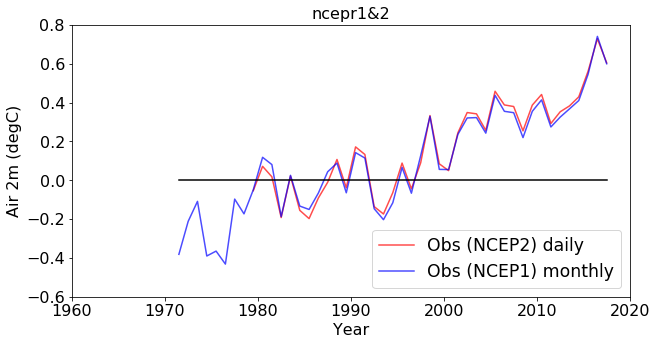

Processing daily cafe nov17n ...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
xxx True
Processing daily cafe jul18b ...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
xxx True
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of d

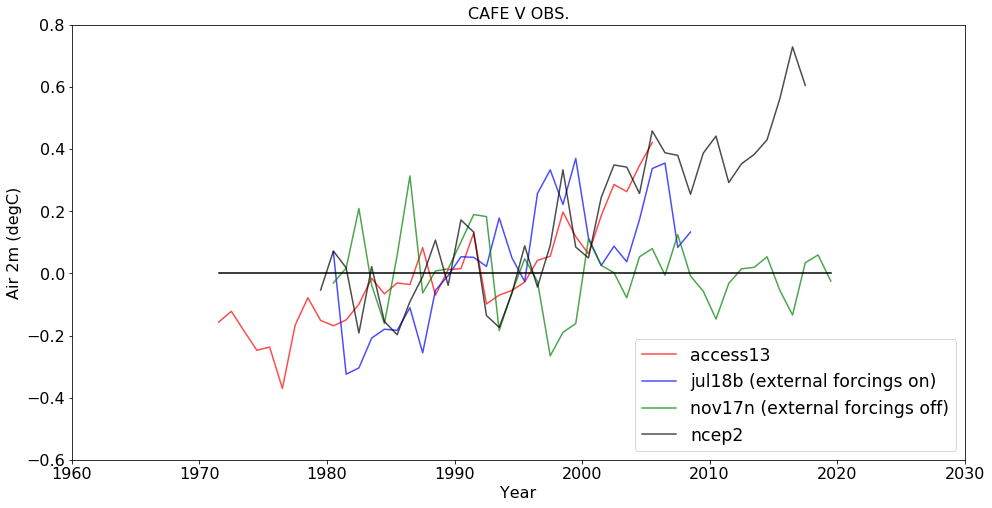

Doing some integrity checks...
END


In [4]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
#===============================================================================

  ivar_str_access13='rlut';offset_access13=0.0;scale_access13=1.0;long_name_access13='Outgoing LW radiation';short_name_access13='OLR';units_access13='W/m^2';table_access13='Amon'
  ivar_str_access13='tas';offset_access13=0.0;scale_access13=1.0;long_name_access13='Air 2m Temperature';short_name_access13='Air 2m';units_access13='degC';table_access13='Amon'

  grid_label_access13='ncep_r1'
  access13_calendar='proleptic_gregorian'
  idir=topdir_vm+'g/data1/ua6/drstree/CMIP5/GCM/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/r1i1p1/'+ivar_str_access13+'/latest'
  access13_monthly_files=[[idir+'/'+ivar_str_access13+'_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]
  
  print('access13_monthly_files=',access13_monthly_files)

#===============================================================================

  #monthly inputs
  product='ncepr1'
  ivar_str_ncepr1='skt';ifil_prefix_ncepr1='skt.sfc';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Surface Temperature';short_name_ncepr1='SST';units_ncepr1='degC'
  ivar_str_ncepr1='air';ifil_prefix_ncepr1='air.2m';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Air 2m Temperature';short_name_ncepr1='Air 2m';units_ncepr1='degC'
#   ivar_str_ncepr1='uswrf';ifil_prefix_ncepr1='uswrf.ntat';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Outgoing SW radiation';short_name_ncepr1='OSR';units_ncepr1='W/m^2'
#   ivar_str_ncepr1='ulwrf';ifil_prefix_ncepr1='ulwrf.ntat';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Outgoing LW radiation';short_name_ncepr1='OLR';units_ncepr1='W/m^2'
  grid_label_ncepr1='ncep_r1'
  ncepr1_calendar='proleptic_gregorian'
  idir=topdir_vm+'short/r67/mac599/data/NCEP_R1'
  idir=topdir_vm+'g/data/r67/mac599/data/NCEP_R1'
  ncepr1_monthly_files=[[idir+'/'+ifil_prefix_ncepr1+'.mon.mean.nc']]
  
  #daily inputs
  product='ncepr1'
  ivar_str_ncepr2='skt';ifil_prefix_ncepr2='skt.sfc';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Surface Temperature';short_name_ncepr2='SST';units_ncepr2='degC'
  ivar_str_ncepr2='air';ifil_prefix_ncepr2='air.2m';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Air 2m Temperature';short_name_ncepr2='Air 2m';units_ncepr2='degC'
#   ivar_str_ncepr2='uswrf';ifil_prefix_ncepr2='uswrf.ntat';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Outgoing SW radiation';short_name_ncepr2='OSR';units_ncepr2='W/m^2'
#   ivar_str_ncepr2='ulwrf';ifil_prefix_ncepr2='ulwrf.ntat';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Outgoing LW radiation';short_name_ncepr2='OLR';units_ncepr2='W/m^2'
  grid_label='ncep_r1'    
  ncepr2_calendar='proleptic_gregorian'
  idir=topdir_vm+'short/v14/mac599/ncep2'
  ncepr2_daily_files=[sorted( \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.197?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.198?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.199?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.200?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.201?.nc') \
    )]

  print('ncepr1_monthly_files=',ncepr1_monthly_files)
  print('ncepr2_daily_files=',ncepr2_daily_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

#   product='HadISST'

#   ivar_str_hadisst='tos';ifil_prefix_hadisst='tos';offset=273.15;scale=1.0;long_name='Surface Temperature';units='degC'

#   grid_label='hadisst'
#   hadisst_calendar='proleptic_gregorian'

#   hadisst_files=[]
#   idir=topdir_vm+'g/data/r67/CMIP5/common_restricted/CMIP5/output/Hadley/HadISST/1d/mon/ocean/Omon/r1i1p1/v20170110/tos'
#   ifils=[ifil_prefix_hadisst+'_Omon_HadISST_1d_r1i1p1_187001-201512.nc']
#   for file in ifils:
#     if(not os.path.exists(idir+'/'+file)):
#       raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
#     else:
#       hadisst_files.append(idir+'/'+file)  
#   hadisst_files=[hadisst_files]

#   print('hadisst_files=',hadisst_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#==============================================================================

  model='CAFE'
  nino_index_k=0
  
  grid_label='gn'
  cafe_calendar='noleap'
    
#   ivar_str_cafe='tos';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Sea Surface Temperature';short_name_cafe='SST';units_cafe='degC';table_cafe='Oday'
  ivar_str_cafe='tas';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Air 2m Temperature';short_name_cafe='Air 2m';units_cafe='degC';table_cafe='day'
#   ivar_str_cafe='swuptoa';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing SW radiation';short_name_cafe='OSR';units_cafe='W/m^2';table_cafe='day'
#   ivar_str_cafe='rlut';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing LW radiation';short_name_cafe='OLR';units_cafe='W/m^2';table_cafe='day'

  ensemble=1
  pval=11
  cafe_daily_files_nov17n=[]
  idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table_cafe+ \
    '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
  daily_ifils_nov17n=[ivar_str_cafe+'_'+table_cafe+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
    grid_label+'_02000101-02391231.nc']
  for file in daily_ifils_nov17n:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      cafe_daily_files_nov17n.append(idir+'/'+file)
  cafe_daily_files_nov17n=[cafe_daily_files_nov17n]

#   ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'
#   ensemble=1
#   pval=11
#   cafe_monthly_files_nov17n=[]
#   idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
#     '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
#   monthly_ifils_nov17n=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
#     grid_label+'_020001-023912.nc']
#   for file in monthly_ifils_nov17n:
#     if(not os.path.exists(idir+'/'+file)):
#       raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
#     else:
#       cafe_monthly_files_nov17n.append(idir+'/'+file)
#   cafe_monthly_files_nov17n=[cafe_monthly_files_nov17n]
  
  print('cafe_daily_files_nov17n=',cafe_daily_files_nov17n)
  #print('cafe_monthly_files_nov17n=',cafe_monthly_files_nov17n)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  model='CAFE'
  nino_index_k=0
  
  grid_label='gn'
  cafe_calendar='noleap'
    
#   ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Oday'
  ivar_str_cafe='tas';offset=0.0;scale=1.0;long_name='Air 2m Temperature';short_name='Air 2m';units='degC';table='day'
#   ivar_str_cafe='swuptoa';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing SW radiation';short_name_cafe='OSR';units_cafe='W/m^2';table_cafe='day'
#   ivar_str_cafe='rlut';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing LW radiation';short_name_cafe='OLR';units_cafe='W/m^2';table_cafe='day'

  ensemble=1
  pval=12
  cafe_daily_files_jul18b=[]
  idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table_cafe+ \
    '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
  daily_ifils_jul18b=[ivar_str_cafe+'_'+table_cafe+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
    grid_label+'_19800101-20081231.nc']
  for file in daily_ifils_jul18b:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      cafe_daily_files_jul18b.append(idir+'/'+file)
  cafe_daily_files_jul18b=[cafe_daily_files_jul18b]

#   ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'
#   ensemble=1
#   pval=12
#   cafe_monthly_files_jul18b=[]
#   idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
#     '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
#   monthly_ifils_jul18b=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
#     grid_label+'_198001-200812.nc']
#   for file in monthly_ifils_jul18b:
#     if(not os.path.exists(idir+'/'+file)):
#       raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
#     else:
#       cafe_monthly_files_jul18b.append(idir+'/'+file)
#   cafe_monthly_files_jul18b=[cafe_monthly_files_jul18b]
  
  print('cafe_daily_files_jul18b=',cafe_daily_files_jul18b)
  #print('cafe_monthly_files_jul18b=',cafe_monthly_files_jul18b)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

#   cbeg=1971
#   cend=2000
#   abeg=1971
#   aend=2015

#   grid_label='hadisst'
#   hadisst_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
#   hadisst_file_var=n_data_funcs(Diag=False,input_files=hadisst_files,input_var_name=ivar_str_hadisst)

#   hadisst_file_var.calculate_filedatetime_info(Diag=False,calendar=hadisst_calendar)

#   hadisst_file_var.get_latlon_info(Diag=False)

#   hadisst_nino_indices.auto_lat_lon(Diag=False, instance_nino=hadisst_nino_indices, instance_data=hadisst_file_var)

#   #hadisst_nino_indices.check_lat_lon(Diag=False, instance_nino=hadisst_nino_indices, instance_data=hadisst_file_var)
  
#   hadisst_monthly_nino=hadisst_file_var.calculate_quantity(hadisst_nino_indices,Diag=True,quantity='nino')*scale-offset

#   hadisst_nino_monthlyclimatology,hadisst_nino_monthly=hadisst_file_var.monthly_clim_anom( \
#     Diag=False,input=hadisst_monthly_nino,AnnOut=False,ZeroClim=True,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)    

#   hadisst_nino_monthlyclimatology,hadisst_nino_monthlyanomaly=hadisst_file_var.monthly_clim_anom( \
#     Diag=False,input=hadisst_monthly_nino,AnnOut=False,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)
    
#   input_datas=(hadisst_nino_monthlyanomaly[:,nino_index_k],)
#   input_xvals=(hadisst_file_var.year_fraction_anomaly,)
  
#   input_xval=hadisst_file_var.year_fraction_anomaly
#   input_datas,input_xvals = (),()
#   for n in range(0,4):
#     input_datas = input_datas + (hadisst_nino_monthlyanomaly[:,n],)
#     input_xvals = input_xvals + (input_xval,)

#   plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
#     title='HadISST', \
#     units='$\!^\circ$C', \
#     xlab='Year', \
#     ylab=hadisst_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  AnnOut=False
  AnnOut=True

#===============================================================================

  print(CRED+'Processing monthly ACCESS13 ...'+CEND)

  cbeg=1981
  cend=2000
  abeg=1971
  aend=2005
  
  grid_label='access13'
  
  if(ivar_str_access13=='tos'):
    access13_nov17n_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  access13_monthly_files=n_data_funcs(input_files=access13_monthly_files,input_var_name=ivar_str_access13)
  
  access13_monthly_files.calculate_filedatetime_info(calendar='proleptic_gregorian')
  
  access13_monthly_files.get_latlon_info(Diag=False)
  
  #cafe_nov17n_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_nov17n_nino_indices, instance_data=cafe_daily_files_nov17n)

  #cafe_nov17n_nino_indices.check_lat_lon(instance_nino=cafe_nov17n_nino_indices, instance_data=cafe_daily_files_nov17n)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  if(ivar_str_cafe=='tos'):
    access13_monthly_quantity_from_monthly=access13_monthly_files.calculate_quantity(access13_nino_indices, quantity='nino')
  else:
    access13_monthly_quantity_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

  access13_quantity_monthlyclimatology_from_monthly, access13_quantity_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
    Diag=False, input=access13_monthly_quantity_from_monthly, AnnOut=AnnOut, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('access13_quantity_monthlyanomaly_from_monthly.shape=',access13_quantity_monthlyanomaly_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  print(CRED+'Processing monthly NCEP...'+CEND) #1948-2018
  
  cbeg=1981
  cend=2000
  abeg=1971
  aend=2017
  
  #monthly inputs
  grid_label='ncep2'
  if(ifil_prefix_ncepr2=='skt.sfc'):
    ncepr1_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  ncepr1_file_var_from_monthly=n_data_funcs(Diag=False,input_files=ncepr1_monthly_files,input_var_name=ivar_str_ncepr2)

  ncepr1_file_var_from_monthly.calculate_filedatetime_info(Diag=False,calendar=ncepr1_calendar)

  ncepr1_file_var_from_monthly.get_latlon_info(Diag=False)

  if(ifil_prefix_ncepr2=='skt.sfc'):
    ncepr1_nino_indices.auto_lat_lon(Diag=False, instance_nino=ncepr1_nino_indices, instance_data=ncepr1_file_var_from_monthly)
    ncepr1_monthly_quantity_from_monthly=ncepr1_file_var_from_monthly.calculate_quantity(ncepr1_nino_indices,Diag=True,quantity='nino')
  else:
    ncepr1_monthly_quantity_from_monthly=ncepr1_file_var_from_monthly.calculate_quantity('dummy',Diag=True,quantity='latlon_region')

  #ncepr1_nino_indices.check_lat_lon(Diag=False, instance_nino=ncepr1_nino_indices, instance_data=ncepr1_file_var)
  
#   ncepr1_quantity_monthlyclimatology_from_monthly, ncepr1_quantity_monthly_from_monthly=ncepr1_file_var_from_monthly.monthly_clim_anom( \
#     Diag=False,input=ncepr1_monthly_quantity_from_monthly,AnnOut=AnnOut,ZeroClim=True,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)  

  ncepr1_quantity_monthlyclimatology_from_monthly, ncepr1_quantity_monthlyanomaly_from_monthly=ncepr1_file_var_from_monthly.monthly_clim_anom( \
    Diag=False,input=ncepr1_monthly_quantity_from_monthly,AnnOut=AnnOut,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)
  
  print(CRED+'Processing daily NCEP...'+CEND) #1979-2018

  cbeg=1981
  cend=2000
  abeg=1979
  aend=2017
  
  #daily inputs  
  ncepr2_file_var_from_daily=n_data_funcs(Diag=False,input_files=ncepr2_daily_files,input_var_name=ivar_str_ncepr2)

  ncepr2_file_var_from_daily.calculate_filedatetime_info(Diag=False,calendar=ncepr2_calendar)

  ncepr2_file_var_from_daily.get_latlon_info(Diag=False)

  if(ifil_prefix_ncepr2=='skt.sfc'):
    ncepr2_nino_indices.auto_lat_lon(Diag=False, instance_nino=ncepr2_nino_indices, instance_data=ncepr2_file_var_from_daily)

  #ncepr2_nino_indices.check_lat_lon(Diag=False, instance_nino=ncepr2_nino_indices, instance_data=ncepr2_file_var)
  if(ifil_prefix_ncepr2=='skt.sfc'):
    ncepr2_quantity_daily=ncepr2_file_var_from_daily.calculate_quantity(ncepr2_nino_indices, quantity='nino')
  else:
    ncepr2_quantity_daily=ncepr2_file_var_from_daily.calculate_quantity('dummy', quantity='latlon_region')
    
  if(ifil_prefix_ncepr2!='skt.sfc'):
    ncepr2_quantity_daily=np.squeeze(ncepr2_quantity_daily)
    
  #print('ncepr2_quantity_daily.shape=',ncepr2_quantity_daily.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  ncepr2_file_var_from_daily.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.
    
  ncepr2_monthly_quantity_from_daily=ncepr2_file_var_from_daily.daily_to_monthly(EndOption=1,input=ncepr2_quantity_daily)
  
#   ncepr2_quantity_monthlyclimatology_from_daily, ncepr2_quantity_monthly_from_daily=ncepr2_file_var_from_daily.monthly_clim_anom( \
#     Diag=False,input=ncepr2_monthly_quantity_from_daily,AnnOut=AnnOut,ZeroClim=True,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)  
#   ncepr2_quantity_monthly_from_daily=ncepr2_quantity_monthly_from_daily-273.15
  
  ncepr2_quantity_monthlyclimatology_from_daily, ncepr2_quantity_monthlyanomaly_from_daily=ncepr2_file_var_from_daily.monthly_clim_anom( \
    Diag=False,input=ncepr2_monthly_quantity_from_daily,AnnOut=AnnOut,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  ###
  
  input_datas = (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
  input_xvals = (ncepr2_file_var_from_daily.year_fraction_anomaly,)

  input_datas = input_datas + (np.average(np.average(ncepr1_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr1_file_var_from_monthly.clat[:]),axis=1),)
  input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)
  
#   input_xval=ncepr2_file_var_from_daily.year_fraction_anomaly
#   input_datas,input_xvals = (),()
#   for n in range(0,4):
#     input_datas = input_datas + (ncepr2_nino_monthlyanomaly_from_daily[:,n],)
#     #input_datas = input_datas + (ncepr2_nino_monthly_from_daily[:,n],)
#     input_xvals = input_xvals + (input_xval,)

  plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
    title='ncepr1&2', \
    units=units_ncepr2, \
    xlab='Year', \
    ylab=short_name_ncepr2+' ('+units_ncepr2+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    line_colors=['red','blue'], \
    line_labels=['Obs (NCEP2) daily','Obs (NCEP1) monthly'], \
    xysize=(10,5))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  print(CRED+'Processing daily cafe nov17n ...'+CEND)

  cbeg=200
  cend=239
  abeg=200
  aend=239
  
  grid_label='gn'
  
  if(ivar_str_cafe=='tos'):
    cafe_nov17n_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  cafe_daily_files_nov17n=n_data_funcs(input_files=cafe_daily_files_nov17n,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_nov17n.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_nov17n.get_latlon_info(Diag=False)
  
  #cafe_nov17n_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_nov17n_nino_indices, instance_data=cafe_daily_files_nov17n)

  #cafe_nov17n_nino_indices.check_lat_lon(instance_nino=cafe_nov17n_nino_indices, instance_data=cafe_daily_files_nov17n)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  if(ivar_str_cafe=='tos'):
    cafe_quantity_daily_nov17n=cafe_daily_files_nov17n.calculate_quantity(cafe_nov17n_nino_indices, quantity='nino')
  else:
    cafe_quantity_daily_nov17n=cafe_daily_files_nov17n.calculate_quantity('dummy', quantity='latlon_region')

  cafe_daily_files_nov17n.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.
    
  cafe_monthly_quantity_from_daily_nov17n=cafe_daily_files_nov17n.daily_to_monthly(EndOption=1,input=cafe_quantity_daily_nov17n)
                                                                
#   cafe_quantity_monthlyclimatology_from_daily_nov17n, cafe_quantity_monthly_from_daily_nov17n=cafe_daily_files_nov17n.monthly_clim_anom( \
#     Diag=False, input=cafe_monthly_quantity_from_daily_nov17n, AnnOut=AnnOut, ZeroClim=True, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  cafe_quantity_monthlyclimatology_from_daily_nov17n, cafe_quantity_monthlyanomaly_from_daily_nov17n=cafe_daily_files_nov17n.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_quantity_from_daily_nov17n, AnnOut=AnnOut, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   cafe_monthly_files_nov17n=n_data_funcs(input_files=cafe_monthly_files_nov17n,input_var_name=ivar_str_cafe)
  
#   cafe_monthly_files_nov17n.calculate_filedatetime_info(calendar=cafe_calendar)
  
#   cafe_monthly_files_nov17n.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
#   cafe_nov17n_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_nov17n_nino_indices, instance_data=cafe_monthly_files_nov17n)
  
#   cafe_nino_monthly_nov17n=cafe_monthly_files_nov17n.calculate_quantity(cafe_nov17n_nino_indices, quantity='nino')
                                                                
#   cafe_nino_monthlyclimatology_from_monthly_nov17n, cafe_nino_monthly_from_monthly_nov17n=cafe_monthly_files_nov17n.monthly_clim_anom( \
#     Diag=False, input=cafe_nino_monthly_nov17n, AnnOut=False, ZeroClim=True, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

#   cafe_nino_monthlyclimatology_from_monthly_nov17n, cafe_nino_monthlyanomaly_from_monthly_nov17n=cafe_monthly_files_nov17n.monthly_clim_anom( \
#     Diag=False, input=cafe_nino_monthly_nov17n, AnnOut=False, ZeroClim=False, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   #print('cafe_nino_monthly_anomaly_from_daily_nov17n.shape=',cafe_nino_monthly_anomaly_from_daily_nov17n.shape)

#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   input_datas = (cafe_nino_monthlyanomaly_from_monthly_nov17n[:,nino_index_k],)
#   input_xvals = (cafe_monthly_files_nov17n.year_fraction_anomaly,)
  
#   input_datas = input_datas + (ncepr2_nino_monthlyanomaly_from_monthly[:,nino_index_k],)
#   input_xvals = input_xvals + (ncepr2_file_var_from_monthly.year_fraction_anomaly,)
  
#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='CAFE nov17n', \
#     units='$\!^\circ$C', \
#     xlab='Year', \
#     ylab=cafe_nov17n_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5), \
#     line_colors=['red','blue'], \
#     line_labels=['nov17n monthly','ncep2'] \
#     )
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  print(CRED+'Processing daily cafe jul18b ...'+CEND)

  cbeg=1981
  cend=2000
  abeg=1980
  aend=2008
  
  grid_label='gn'
  
  if(ivar_str_cafe=='tos'):
    cafe_jul18b_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  cafe_daily_files_jul18b=n_data_funcs(input_files=cafe_daily_files_jul18b,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_jul18b.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_jul18b.get_latlon_info(Diag=False)
  
  #cafe_jul18b_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_jul18b_nino_indices, instance_data=cafe_daily_files_jul18b)

  #cafe_jul18b_nino_indices.check_lat_lon(instance_nino=cafe_jul18b_nino_indices, instance_data=cafe_daily_files_jul18b)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  if(ivar_str_cafe=='tos'):
    cafe_quantity_daily_jul18b=cafe_daily_files_jul18b.calculate_quantity(cafe_jul18b_nino_indices, quantity='nino')
  else:
    cafe_quantity_daily_jul18b=cafe_daily_files_jul18b.calculate_quantity('dummy', quantity='latlon_region')

  cafe_daily_files_jul18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.
    
  cafe_monthly_quantity_from_daily_jul18b=cafe_daily_files_jul18b.daily_to_monthly(EndOption=1,input=cafe_quantity_daily_jul18b)
                                                                
#   cafe_quantity_monthlyclimatology_from_daily_jul18b, cafe_quantity_monthly_from_daily_jul18b=cafe_daily_files_jul18b.monthly_clim_anom( \
#     Diag=False, input=cafe_monthly_quantity_from_daily_jul18b, AnnOut=AnnOut, ZeroClim=True, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  cafe_quantity_monthlyclimatology_from_daily_jul18b, cafe_quantity_monthlyanomaly_from_daily_jul18b=cafe_daily_files_jul18b.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_quantity_from_daily_jul18b, AnnOut=AnnOut, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   cafe_monthly_files_jul18b=n_data_funcs(input_files=cafe_monthly_files_jul18b,input_var_name=ivar_str_cafe)
  
#   cafe_monthly_files_jul18b.calculate_filedatetime_info(calendar=cafe_calendar)
  
#   cafe_monthly_files_jul18b.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
#   cafe_jul18b_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_jul18b_nino_indices, instance_data=cafe_monthly_files_jul18b)
  
#   cafe_nino_monthly_jul18b=cafe_monthly_files_jul18b.calculate_quantity(cafe_jul18b_nino_indices, quantity='nino')
                                                                
#   cafe_nino_monthlyclimatology_from_monthly_jul18b, cafe_nino_monthly_from_monthly_jul18b=cafe_monthly_files_jul18b.monthly_clim_anom( \
#     Diag=False, input=cafe_nino_monthly_jul18b, AnnOut=False, ZeroClim=True, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

#   cafe_nino_monthlyclimatology_from_monthly_jul18b, cafe_nino_monthlyanomaly_from_monthly_jul18b=cafe_monthly_files_jul18b.monthly_clim_anom( \
#     Diag=False, input=cafe_nino_monthly_jul18b, AnnOut=False, ZeroClim=False, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   #print('cafe_nino_monthly_anomaly_from_daily_jul18b.shape=',cafe_nino_monthly_anomaly_from_daily_jul18b.shape)

#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   input_datas = (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
#   input_xvals = (ncepr2_file_var_from_daily.year_fraction_anomaly,)

#   input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr2_file_var_from_monthly.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr2_file_var_from_monthly.year_fraction_anomaly,)  
  
  input_datas = (np.average(np.average(access13_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=access13_monthly_files.clat[:]),axis=1),)
  input_xvals = (access13_monthly_files.year_fraction_anomaly,)
  
  input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_jul18b[:],axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
  input_xvals = input_xvals + (cafe_daily_files_jul18b.year_fraction_anomaly,)
  
  input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_nov17n[:],axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
  input_xvals = input_xvals + (cafe_daily_files_nov17n.year_fraction_anomaly+1780.0,) #put on approx. same time axis.
  
#from monthly ncepr1
#   input_datas = input_datas + (np.average(np.average(ncepr1_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr1_file_var_from_monthly.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)
  
#from daily ncepr2
  input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
  input_xvals = input_xvals + (ncepr2_file_var_from_daily.year_fraction_anomaly,)
  
  plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
    title='CAFE V OBS.', \
    units=units_cafe, \
    xlab='Year', \
    ylab=short_name_cafe+' ('+units_cafe+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green','black'], \
    line_labels=['access13','jul18b (external forcings on)','nov17n (external forcings off)','ncep2'] \
    )
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================
print('Doing some integrity checks...')

if(ivar_str_cafe=='tos'):
  if(ncepr2_nino_indices.indices_label==hadisst_nino_indices.indices_label==cafe_nov17n_nino_indices.indices_label==cafe_jul18b_nino_indices.indices_label):
    print('ok')
  else:
    raise SystemExit('Issue with nino_indices:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

print('END')

In [ ]:
input_datas = (np.average(np.average(access13_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=access13_monthly_files.clat[:]),axis=1),)
input_xvals = (access13_monthly_files.year_fraction_anomaly,)

input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_jul18b[:],axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
input_xvals = input_xvals + (cafe_daily_files_jul18b.year_fraction_anomaly,)

input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_nov17n[:],axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
input_xvals = input_xvals + (cafe_daily_files_nov17n.year_fraction_anomaly+1780.0,) #put on approx. same time axis.

#from monthly ncepr1
#   input_datas = input_datas + (np.average(np.average(ncepr1_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr1_file_var_from_monthly.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)

#from daily ncepr2
input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
input_xvals = input_xvals + (ncepr2_file_var_from_daily.year_fraction_anomaly,)

plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE V OBS.', \
  units=units_cafe, \
  xlab='Year', \
  ylab=short_name_cafe+' ('+units_cafe+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=['red','blue','green','black'], \
  line_labels=['access13','jul18b (external forcings on)','nov17n (external forcings off)','ncep2'] \
  )